In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

### dataset 1

In [53]:
demog = pd.read_csv("Indian automoble buying behavour study 1.0.csv")
demog.columns.values.tolist()

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Make',
 'Price']

In [54]:
demog.head(10)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


In [55]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [56]:
demog.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [57]:
demog.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [58]:
#conveting yes in to 1 and no into 0

In [59]:
MD=demog.iloc[:,0:11].replace("Yes",1).replace("No",0)

In [60]:
MD.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000
1,35,Salaried,Married,Post Graduate,2,1,1,1,1400000,600000,2000000
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000
4,31,Salaried,Married,Post Graduate,2,1,0,1,1800000,800000,2600000


In [61]:
MD.describe()

,Age,No of Dependents,Personal loan,House Loan,Salary,Wife Salary,Total Salary
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,0.323232,0.373737,1.736364e+06,5.343434e+05,2.270707e+06
std,6.246054,1.335265,0.470091,0.486257,6.736217e+05,6.054450e+05,1.050777e+06
min,26.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05
25%,31.000000,2.000000,0.000000,0.000000,1.300000e+06,0.000000e+00,1.550000e+06
50%,36.000000,2.000000,0.000000,0.000000,1.600000e+06,5.000000e+05,2.100000e+06
75%,41.000000,3.000000,1.000000,1.000000,2.200000e+06,9.000000e+05,2.700000e+06
max,51.000000,4.000000,1.000000,1.000000,3.800000e+06,2.100000e+06,5.200000e+06


Text(0, 0.5, 'Frequency')

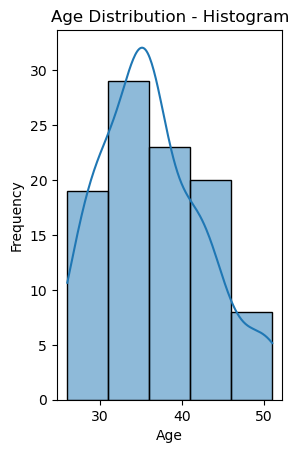

In [62]:
# Histogram for Age distribution
plt.subplot(1, 2, 1)
sns.histplot(MD['Age'], bins=5, kde=True)
plt.title("Age Distribution - Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Count')

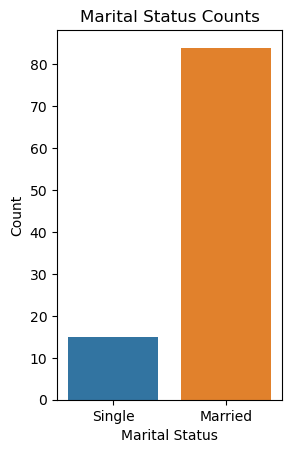

In [63]:
# 2. Marital Status and Dependents: Bar chart of Marital Status counts and average number of dependents

# Count of Marital Status
plt.subplot(1, 2, 1)
sns.countplot(x='Marrital Status', data=MD)
plt.title("Marital Status Counts")
plt.xlabel("Marital Status")
plt.ylabel("Count")


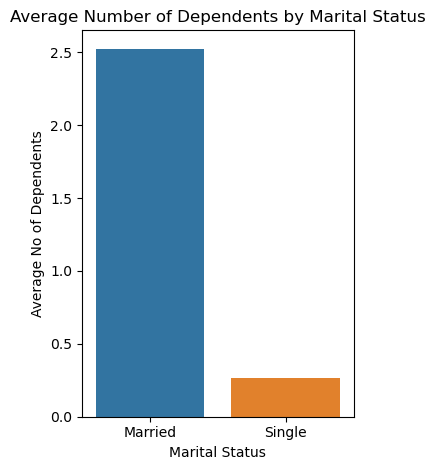

In [64]:
# Average number of dependents across marital statuses
dependents_by_marital_status = MD.groupby('Marrital Status')['No of Dependents'].mean().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(x='Marrital Status', y='No of Dependents', data=dependents_by_marital_status)
plt.title("Average Number of Dependents by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average No of Dependents")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

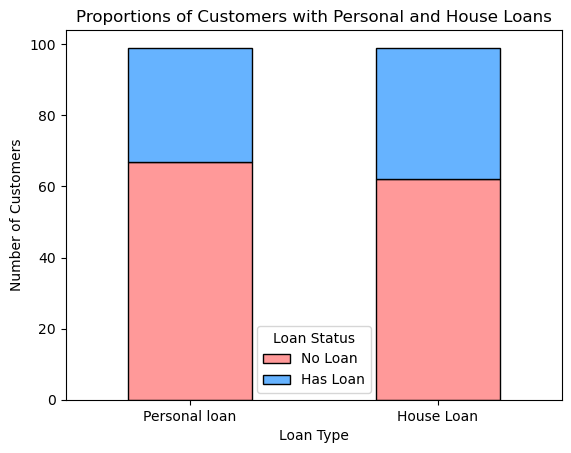

In [65]:
#  Loan Proportions: Stacked Bar Chart

loan_counts = MD[['Personal loan', 'House Loan']].apply(pd.Series.value_counts).transpose()
loan_counts.columns = ['No Loan', 'Has Loan']

plt.figure(figsize=(10, 6))
loan_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], edgecolor='black')
plt.title("Proportions of Customers with Personal and House Loans")
plt.xlabel("Loan Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()


Text(0, 0.5, 'Frequency')

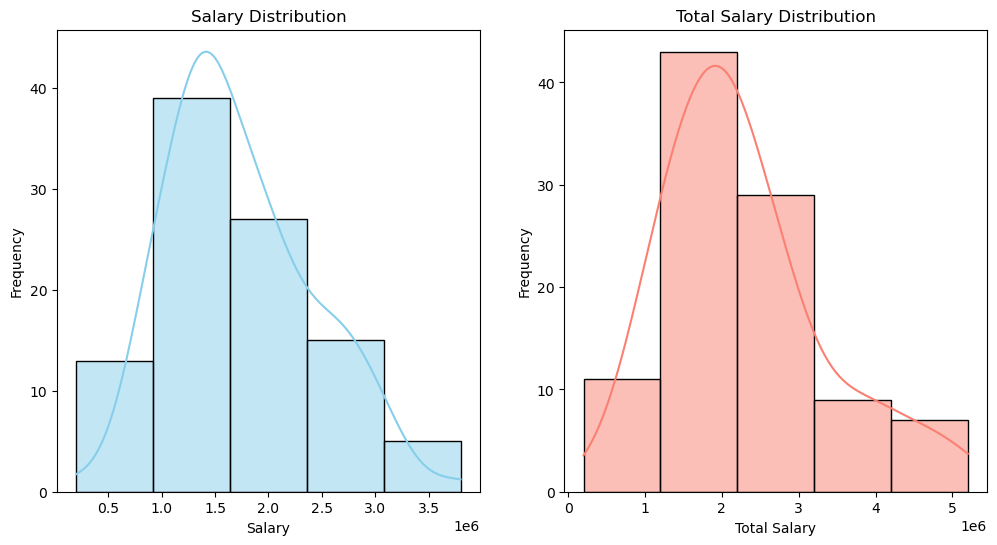

In [66]:
#  Salary and Total Salary Distribution
plt.figure(figsize=(12, 6))

# Histogram for Salary
plt.subplot(1, 2, 1)
sns.histplot(MD['Salary'], bins=5, kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(MD['Total Salary'], bins=5, kde=True, color='salmon')
plt.title("Total Salary Distribution")
plt.xlabel("Total Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Salary')

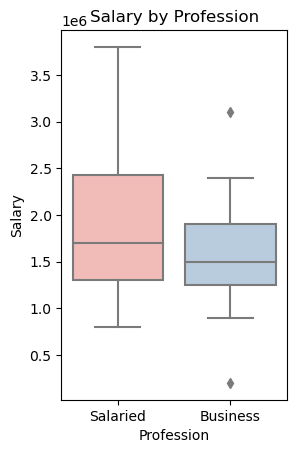

In [67]:
# Box Plot for Salary by Profession
plt.subplot(1, 2, 1)
sns.boxplot(x='Profession', y='Salary', data=MD, palette='Pastel1')
plt.title("Salary by Profession")
plt.xlabel("Profession")
plt.ylabel("Salary")


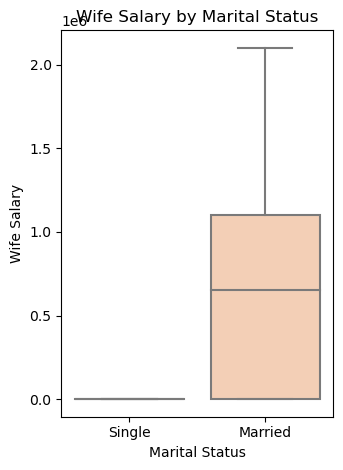

In [68]:
# Box Plot for Wife Salary by Marital Status
plt.subplot(1, 2, 2)
sns.boxplot(x='Marrital Status', y='Wife Salary', data=MD, palette='Pastel2')
plt.title("Wife Salary by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Wife Salary")

plt.tight_layout()
plt.show()

In [69]:
MD.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000
1,35,Salaried,Married,Post Graduate,2,1,1,1,1400000,600000,2000000
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000
4,31,Salaried,Married,Post Graduate,2,1,0,1,1800000,800000,2600000


In [70]:
# One-Hot Encoding for categorical columns with more than two categories
df = pd.get_dummies(MD, columns=['Profession', 'Marrital Status', 'Education'], drop_first=True)

# Normalize Numerical Columns
# Select numerical columns to normalize
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


df

# 1 for salaried 0 for Business
# 1 for single 0 for married
#1 for post graduated 0 for graduated 
# this chages happend after applieng hot encoder 

,Age,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Profession_Salaried,Marrital Status_Single,Education_Post Graduate
0,-1.498630,-1.642313,1,0,0,-1.397118,-0.887055,-1.406760,1,1,1
1,-0.211304,-0.136859,1,1,1,-0.501877,0.108995,-0.258937,1,0,1
2,1.397855,1.368594,1,1,0,0.094950,-0.887055,-0.450240,0,0,0
3,0.754191,0.615867,0,0,1,-0.203464,0.108995,-0.067633,0,0,1
4,-0.854967,-0.136859,1,0,1,0.094950,0.441012,0.314975,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,-1.642313,0,0,0,0.990190,-0.887055,0.123671,0,1,0
95,2.202434,0.615867,0,0,1,3.079085,1.271054,2.706274,1,0,1
96,2.363350,-0.136859,1,1,0,0.691777,-0.887055,-0.067633,0,0,0
97,2.363350,-0.136859,0,0,1,1.437811,1.271054,1.654102,1,0,1


In [71]:
print(df.dtypes)

Age                        float64
No of Dependents           float64
Personal loan                int64
House Loan                   int64
Wife Working                object
Salary                     float64
Wife Salary                float64
Total Salary               float64
Profession_Salaried          uint8
Marrital Status_Single       uint8
Education_Post Graduate      uint8
dtype: object


In [72]:
df['Wife Working'] = pd.to_numeric(df['Wife Working'], errors='coerce')

In [73]:
print(df.dtypes)

Age                        float64
No of Dependents           float64
Personal loan                int64
House Loan                   int64
Wife Working               float64
Salary                     float64
Wife Salary                float64
Total Salary               float64
Profession_Salaried          uint8
Marrital Status_Single       uint8
Education_Post Graduate      uint8
dtype: object


In [74]:
if df.isnull().sum().any():
    print("Warning: There are missing values in the dataset.")
    df = df.dropna() 

In [111]:
pca = PCA()
MD_pca=pca.fit_transform(df)


SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.947670e+00,5.072861e-01,0.507286
PC2,1.120126e+00,1.677861e-01,0.675072
PC3,9.991698e-01,1.335059e-01,0.808578
PC4,6.296223e-01,5.301298e-02,0.861591
PC5,5.221087e-01,3.645388e-02,0.898045
PC6,4.993026e-01,3.333878e-02,0.931384
PC7,4.320733e-01,2.496530e-02,0.956349
PC8,3.760096e-01,1.890689e-02,0.975256
PC9,3.173720e-01,1.346974e-02,0.988726
PC10,2.391619e-01,7.649027e-03,0.996375


In [112]:
# Display standard deviations
print("Standard Deviation:\n", SD.round(1))

# Loadings matrix (components)
load = pca.components_

# Transpose the loadings matrix for the rotation matrix
rot_matrix = load.T

# Create DataFrame with rotation matrix and round the values
rot_df = pd.DataFrame(rot_matrix, index=df.columns.values, columns=index)
rot_df = rot_df.round(3)

# Display the rotation matrix
rot_df


Standard Deviation:
 [1.9 1.1 1.  0.6 0.5 0.5 0.4 0.4 0.3 0.2 0.2 0. ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Age,0.392,0.333,0.309,0.596,-0.199,0.410,-0.000,0.238,0.077,0.087,0.080,-0.000
No of Dependents,0.303,0.615,-0.335,-0.027,0.187,-0.129,0.209,-0.539,0.011,0.174,-0.020,-0.000
Personal loan,-0.015,0.138,0.025,-0.421,-0.348,0.368,-0.164,-0.174,0.656,-0.228,-0.078,-0.000
House Loan,0.065,0.129,-0.015,-0.455,-0.368,0.339,-0.168,0.037,-0.612,0.339,0.049,0.000
Wife Working,0.119,-0.260,-0.245,0.083,-0.100,0.206,0.146,-0.253,-0.110,-0.349,0.762,0.000
Salary,0.396,0.012,0.599,-0.300,0.084,-0.307,0.001,-0.076,-0.049,-0.160,0.155,-0.486
Wife Salary,0.375,-0.540,-0.286,0.151,-0.093,0.155,-0.035,-0.218,0.079,0.265,-0.338,-0.436
Total Salary,0.470,-0.304,0.219,-0.105,0.000,-0.107,-0.020,-0.175,0.014,0.050,-0.096,0.757
Profession_Salaried,0.033,-0.087,0.069,-0.279,0.314,0.385,0.766,0.239,0.071,0.100,-0.056,-0.000
Marrital Status_Single,-0.119,-0.082,0.091,-0.053,0.079,-0.114,-0.111,0.026,0.379,0.742,0.491,0.000


C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

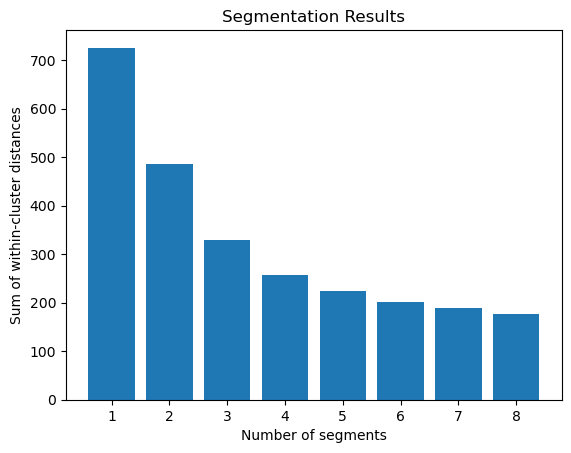

In [113]:
from sklearn.cluster import KMeans

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_pca)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show() 

C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

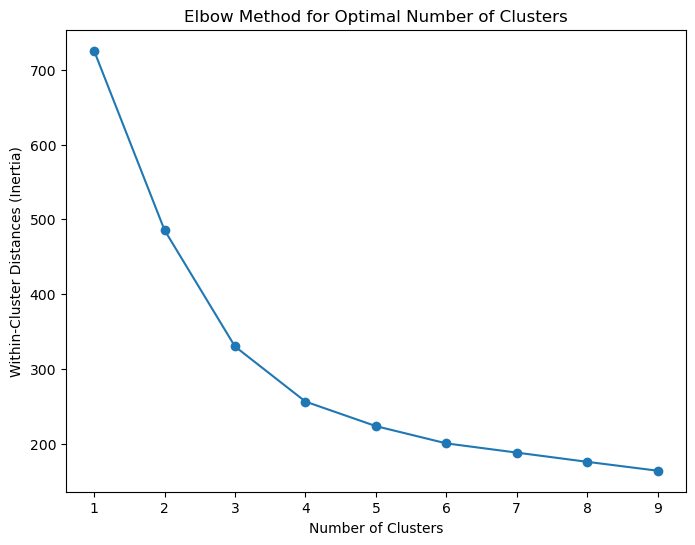

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Replace "MD" with your dataframe or data after PCA, if applicable
data = MD_pca    # This assumes MD is the dataset you are using for clustering

# Define the range for number of clusters to test
num_clusters = range(1, 10)  # Adjust the range as needed

# List to store the within-cluster distances (inertia) for each number of clusters
within_cluster_distances = []

# Calculate KMeans for each number of clusters and store inertia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(data)
    within_cluster_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, within_cluster_distances, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Distances (Inertia)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xticks(num_clusters)
plt.show()


In [97]:
# Define the optimal number of clusters based on the elbow plot
optimal_k = 4  # Replace this with the number you found to be optimal

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k , n_init=nrep, random_state=1234)
kmeans.fit(MD_pca)

C:\Users\91766\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=1234)

In [115]:
# check the labels assigned to each data point
print(kmeans.labels_)
     

[2 4 3 4 4 8 4 1 1 4 4 5 2 8 7 2 2 2 5 4 4 4 4 4 4 8 1 4 4 1 4 0 4 3 7 5 5
 2 5 8 2 5 4 8 0 8 4 4 4 3 7 6 7 7 6 6 2 2 2 2 2 2 8 4 1 0 1 0 1 4 0 1 5 5
 0 1 4 6 7 3 7 6 6 6 3 2 4 0 1 1 0 6 2 2 7 3 7 3]


In [116]:

# check the size of clusters
pd.Series(kmeans.labels_).value_counts()

4    24
2    16
1    11
7     9
5     8
0     8
6     8
3     7
8     7
dtype: int64

In [117]:
# adding a new feature of cluster labels to the dataset 3
df['clusters'] = kmeans.labels_

C:\Users\91766\AppData\Local\Temp\ipykernel_39440\352828039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.labels_


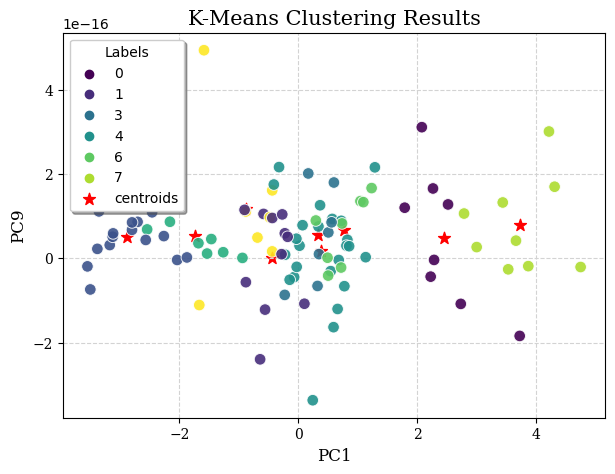

In [119]:

# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=MD_pca, x=MD_pca[:, 0], y=MD_pca[:, -1], s=70, hue=kmeans.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, -1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()


### dataset2

In [120]:
demog1 = pd.read_csv(r"C:\Users\91766\EV_Dataset.csv")
demog1.columns.values.tolist()

['Year',
 'Month_Name',
 'Date',
 'State',
 'Vehicle_Class',
 'Vehicle_Category',
 'Vehicle_Type',
 'EV_Sales_Quantity']

### EDA

In [125]:

demog1.head(5)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [123]:
demog1.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [131]:
demog1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


### preprocessing

In [132]:
# Check for missing values
print(demog1.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [133]:
# Check data types
print(demog1.dtypes)


Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object


In [137]:
# Convert date column to datetime type if it's not already
demog1['Date'] = pd.to_datetime(demog1['Date'])
# Check data types
print(demog1.dtypes)

Year                        float64
Month_Name                   object
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
dtype: object


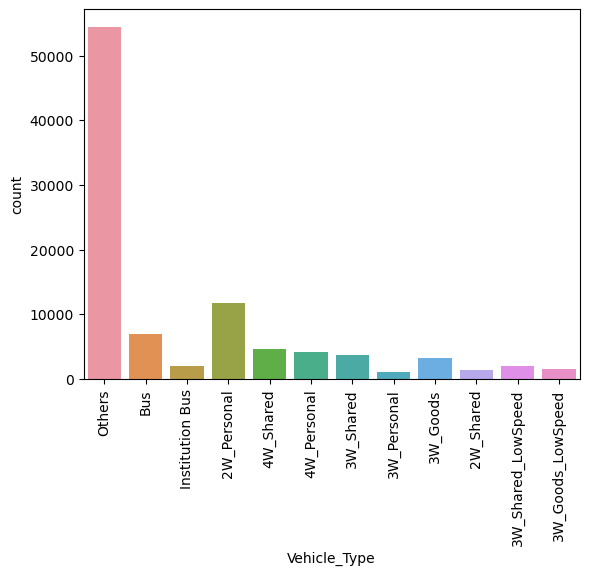

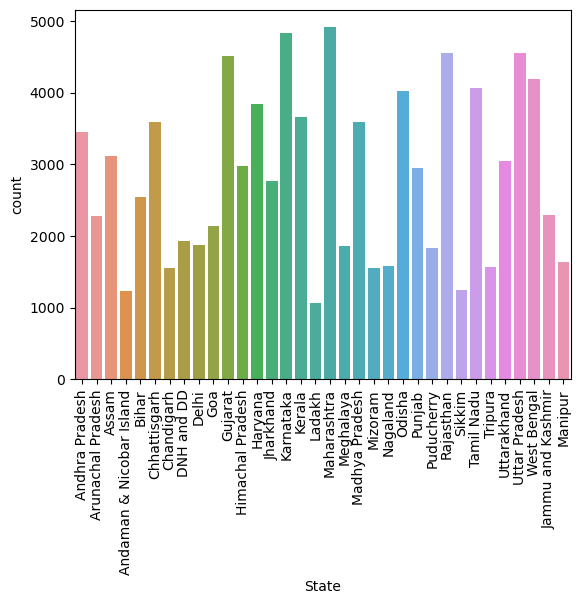

In [139]:
# Count plot for categorical variables
sns.countplot(x='Vehicle_Type', data=demog1)
plt.xticks(rotation=90)
plt.show()

# Count plot for 'State'
sns.countplot(x='State', data=demog1)
plt.xticks(rotation=90)
plt.show()

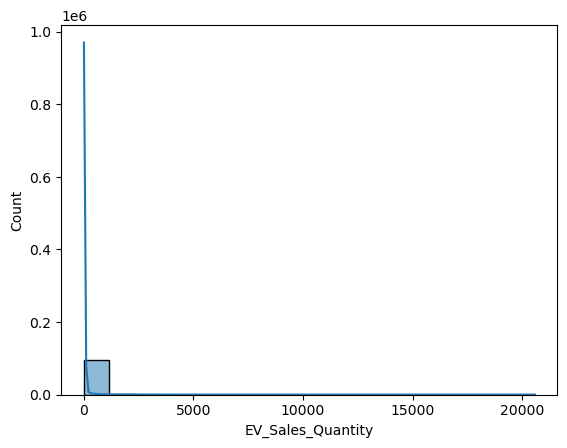

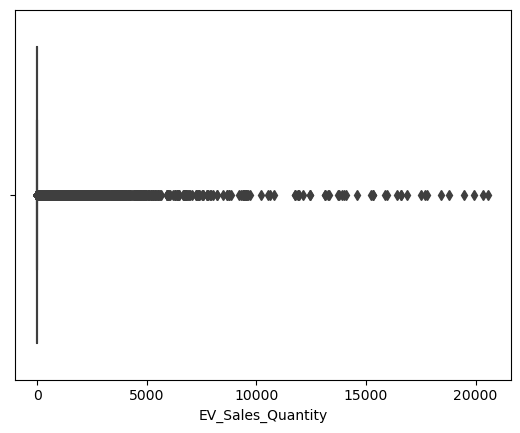

In [141]:
# Histogram for 'EV_Sales_Quantity'
sns.histplot(demog1['EV_Sales_Quantity'], kde=True)
plt.show()

# Boxplot to check for outliers in EV Sales Quantity
sns.boxplot(x=demog1['EV_Sales_Quantity'])
plt.show()

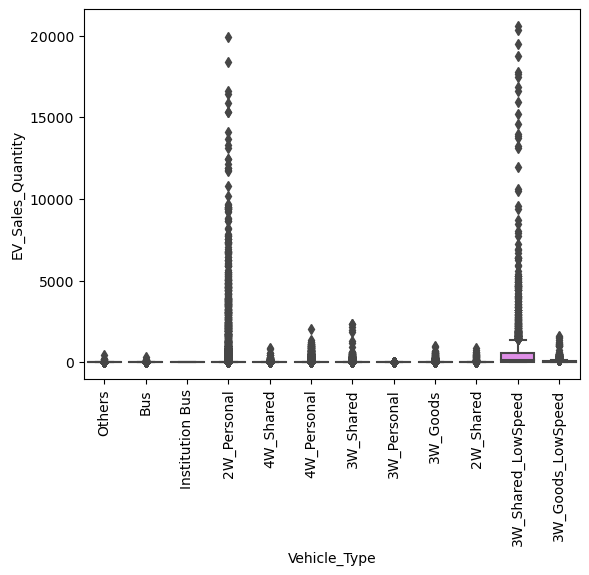

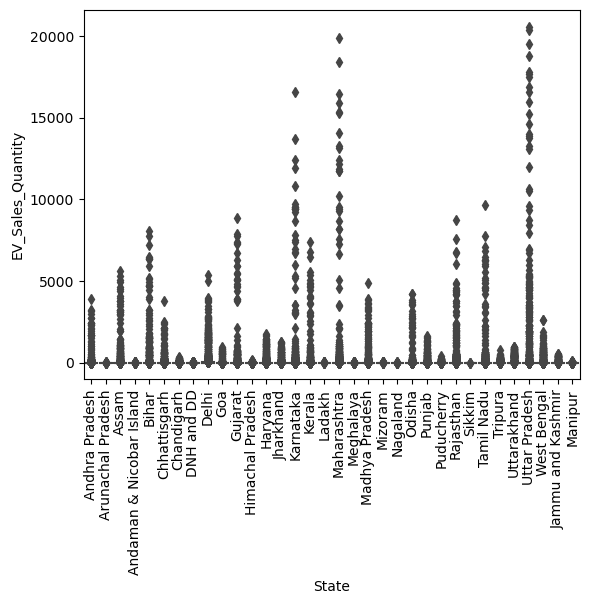

In [143]:
#Categorical vs. Numerical:

# Boxplot for 'EV_Sales_Quantity' by 'Vehicle_Type'
sns.boxplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=demog1)
plt.xticks(rotation=90)
plt.show()

# Boxplot for 'EV_Sales_Quantity' by 'State'
sns.boxplot(x='State', y='EV_Sales_Quantity', data=demog1)
plt.xticks(rotation=90)
plt.show()

In [151]:
print(demog1.columns)

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity', 'YearMonth'],
      dtype='object')


In [152]:
demog1.columns = demog1.columns.str.strip()  # This will remove any leading or trailing spaces from column names


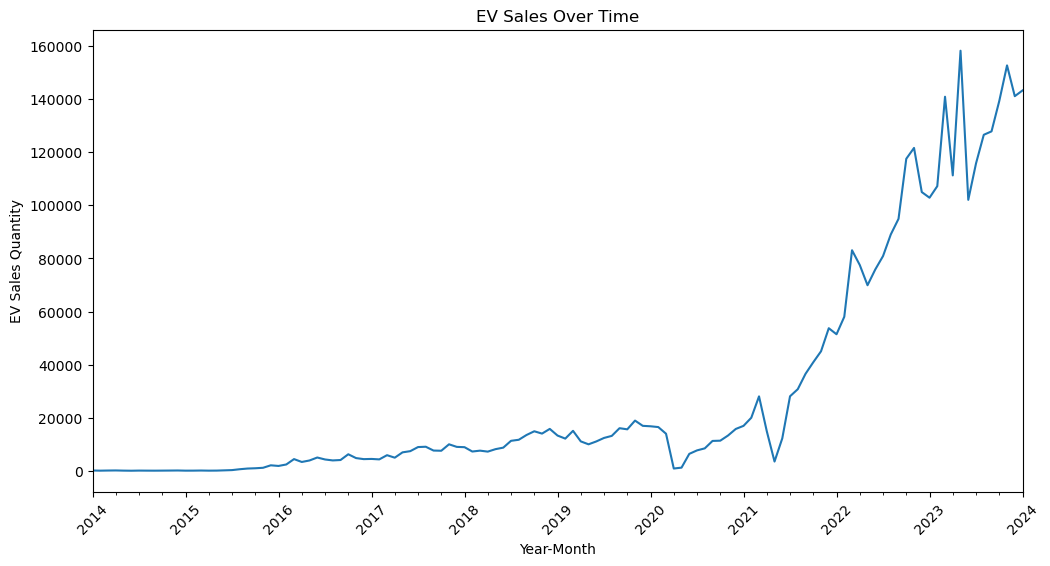

In [153]:
# Group data by year and month to see EV sales trends over time
demog1['YearMonth'] = demog1['Date'].dt.to_period('M')
monthly_sales = demog1.groupby('YearMonth')['EV_Sales_Quantity'].sum()  # Removed extra space

# Plot EV sales over time
monthly_sales.plot(kind='line', figsize=(12,6))
plt.title('EV Sales Over Time')
plt.ylabel('EV Sales Quantity')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

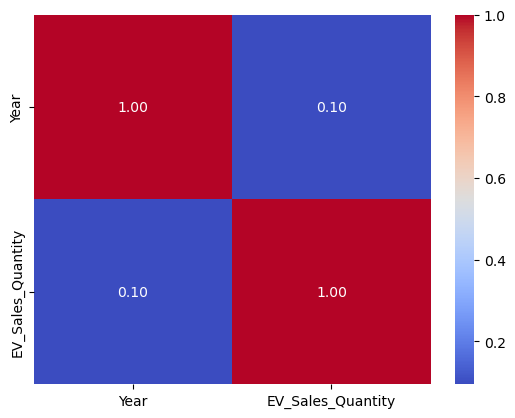

In [154]:
# Correlation matrix (if you have other numerical variables)
corr_matrix = demog1.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [155]:
# Check for missing values
print(demog1.isnull().sum())

# Drop rows with missing values (if any)
demog1.dropna(inplace=True)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
YearMonth            0
dtype: int64


In [156]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# One-hot encode categorical features like 'State', 'Vehicle_Class', etc.
demog1 = pd.get_dummies(demog1, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'])

In [157]:
demog1

,Year,Month_Name,Date,EV_Sales_Quantity,YearMonth,State_Andaman & Nicobar Island,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,Vehicle_Type_3W_Goods,Vehicle_Type_3W_Goods_LowSpeed,Vehicle_Type_3W_Personal,Vehicle_Type_3W_Shared,Vehicle_Type_3W_Shared_LowSpeed,Vehicle_Type_4W_Personal,Vehicle_Type_4W_Shared,Vehicle_Type_Bus,Vehicle_Type_Institution Bus,Vehicle_Type_Others
0,2014.0,jan,2014-01-01,0.0,2014-01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014.0,jan,2014-01-01,0.0,2014-01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2014.0,jan,2014-01-01,0.0,2014-01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014.0,jan,2014-01-01,0.0,2014-01,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014.0,jan,2014-01-01,0.0,2014-01,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023.0,dec,2023-12-01,1.0,2023-12,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
96841,2023.0,dec,2023-12-01,5.0,2023-12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96842,2023.0,dec,2023-12-01,0.0,2023-12,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
96843,2023.0,dec,2023-12-01,0.0,2023-12,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [158]:
print(demog1.dtypes)

Year                                   float64
Month_Name                              object
Date                            datetime64[ns]
EV_Sales_Quantity                      float64
YearMonth                            period[M]
                                     ...      
Vehicle_Type_4W_Personal                 uint8
Vehicle_Type_4W_Shared                   uint8
Vehicle_Type_Bus                         uint8
Vehicle_Type_Institution Bus             uint8
Vehicle_Type_Others                      uint8
Length: 129, dtype: object


In [159]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['EV_Sales_Quantity', 'Year']  # Include other relevant numerical features
scaler = StandardScaler()

# Scale the selected numerical columns
demog1[numerical_cols] = scaler.fit_transform(demog1[numerical_cols])

In [161]:
# Selecting relevant features for clustering
X = demog1[['EV_Sales_Quantity', 'Year', 'State_Andhra Pradesh', 'State_Karnataka', 'Vehicle_Type_Bus']]  # Example

In [162]:
from sklearn.cluster import KMeans

# Define the optimal number of clusters
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=1234)
demog1['Cluster'] = kmeans.fit_predict(X)

# View the cluster centers
print(kmeans.cluster_centers_)

[[-7.72308123e-02 -8.83086579e-01  3.44165841e-02  5.06969780e-02
   7.80699720e-02]
 [-2.80307147e-02  8.44522010e-01  3.69561668e-02  4.88531548e-02
   6.78311975e-02]
 [ 8.96859435e+00  1.12150708e+00  3.86740331e-02  4.97237569e-02
   4.16333634e-17]
 [ 2.98198979e+01  1.40233910e+00  6.93889390e-18  2.33333333e-01
   0.00000000e+00]]


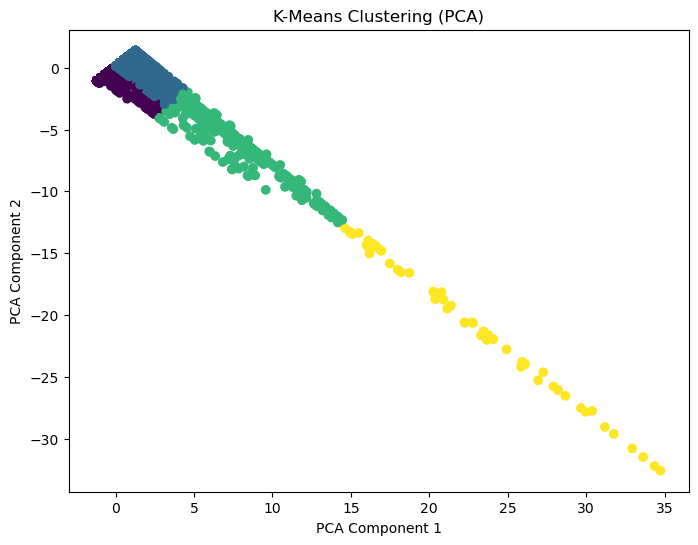

In [163]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=demog1['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()